# Audio Pre-Processing with Librosa

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np

# Audio processing libraries
import librosa  
import librosa.display

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Configuration
# Configuration
base_data_dir = "../data/raw" 
sample_rate = 16000 # 16KHz


In [3]:
def check_audio_files(folder_name):
    full_path = os.path.join(base_data_dir, folder_name)    
    files = [os.path.join(full_path, f) for f in os.listdir(full_path) if f.endswith('.wav')]
    print(f"   Found {len(files)} files in {folder_name}")
    
    # Check first file
    if files:
        try:
            y, _ = librosa.load(files[0], sr=sample_rate, duration=10.0)
            print(f"Check for sample time {folder_name}. Length: {len(y)/sample_rate}s")
            return files[0] # Return one file for visualization
        except Exception as e:
            print(f"Failed to load sample: {e}")
            return None
    return None

In [4]:
# Run Checks
normal_sample = check_audio_files("normal")
abnormal_sample = check_audio_files("abnormal")

   Found 1005 files in normal
Check for sample time normal. Length: 10.0s
   Found 146 files in abnormal
Check for sample time abnormal. Length: 10.0s


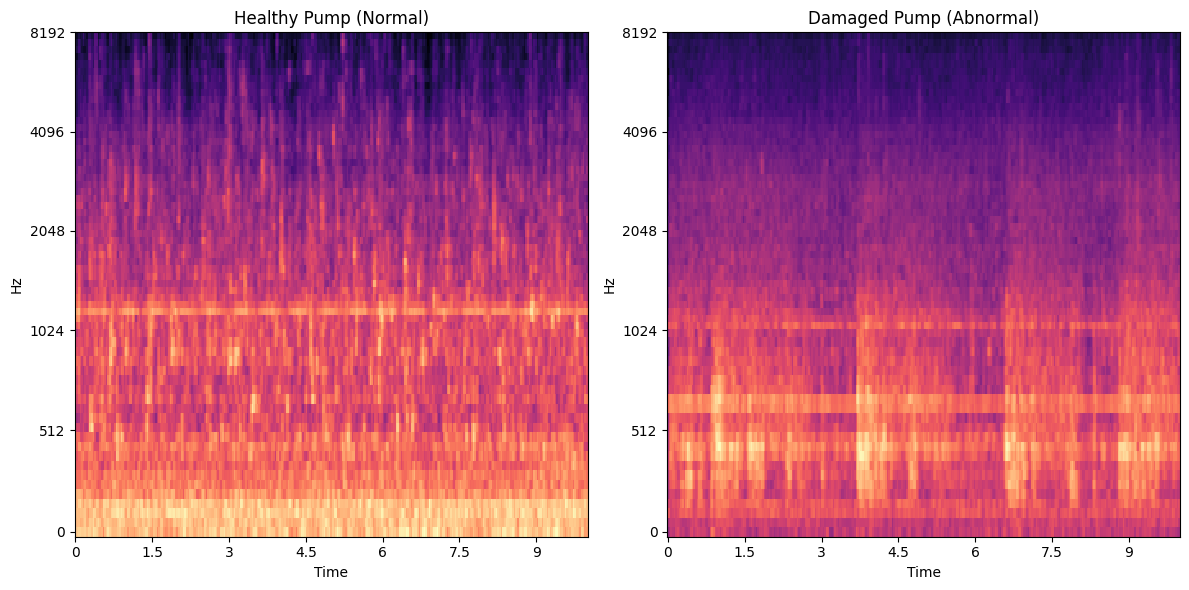

In [5]:
# visualization
plt.figure(figsize=(12, 6))
    
# Healthy Spectrogram
plt.subplot(1, 2, 1)
y_n, _ = librosa.load(normal_sample, sr=sample_rate)
S_n = librosa.power_to_db(librosa.feature.melspectrogram(y=y_n, sr=sample_rate, n_mels=64), ref=np.max)
librosa.display.specshow(S_n, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title("Healthy Pump (Normal)")
    
# Broken Spectrogram
plt.subplot(1, 2, 2)
y_a, _ = librosa.load(abnormal_sample, sr=sample_rate)
S_a = librosa.power_to_db(librosa.feature.melspectrogram(y=y_a, sr=sample_rate, n_mels=64), ref=np.max)
librosa.display.specshow(S_a, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title("Damaged Pump (Abnormal)")
    
plt.tight_layout()
plt.show()